**Regression Analysis, Sampling Methods & Probability Distributions**

# **Causality, Correlation vs. Regression**

## Causality

In statistical analysis, causality refers to a cause-and-effect relationship between variables. It means that a change in one variable directly influences or produces a change in another variable. Establishing causality is crucial for understanding the underlying mechanisms driving observed relationships in data. However, it is important to note that correlation does not imply causation. Just because two variables are related does not mean that one causes the other. There may be other factors that are influencing both variables.


## Correlation vs. Regression

**Correlation** measures the strength and direction of the linear relationship between two variables. It quantifies how strongly two variables are related to each other. Correlation coefficients range from -1 to +1, where -1 indicates a perfect negative linear relationship, +1 indicates a perfect positive linear relationship, and 0 indicates no linear relationship.

**Regression analysis** aims to model the relationship between a target variable and one or more predictor variables. It attempts to predict the value of the target variable based on the values of the predictor variables. Linear regression is a common regression technique that assumes a linear relationship between the target variable and the predictor variables.

***The key difference between correlation and regression is that correlation measures the strength of the relationship between two variables, while regression aims to model and predict the target variable based on predictor variables.***

In [4]:
# Let's Import the Necessary Libraries

import pandas as pd
import numpy as np
import statsmodels.api as sm

In [ ]:
# Now, we'll load a Housing Dataset (California Housing Dataset) from scikit-learn Library

from sklearn.datasets import fetch_california_housing # Changed import to fetch_california_housing

# Load the California housing dataset

housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
# Now, We'll Add the Target Variable (House Price)

df['MEDV'] = housing.target

# Display basic info
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
# Let's check the details of the Dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   MEDV        20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


## **Performing a Multiple Linear Regression Model**

This will help us understand the impact of the Features (Independent Variables) on the Target (Dependent Variable i.e. Median Home Price).

In [ ]:
# Define independent variables (features)
X = df[['MedInc', 'Population', 'HouseAge', 'AveBedrms']]  # Selecting Median Income, House Age, Average Rooms
y = df['MEDV']  # Dependent variable (Median home price)

# Add a constant for intercept
X = sm.add_constant(X)

# Fit Multiple Linear Regression model
model = sm.OLS(y, X).fit()

# Display summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     5374.
Date:                Wed, 26 Mar 2025   Prob (F-statistic):               0.00
Time:                        14:09:20   Log-Likelihood:                -24875.
No. Observations:               20640   AIC:                         4.976e+04
Df Residuals:                   20635   BIC:                         4.980e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2242      0.028     -8.084      0.0

## **Understanding and Interpreting the Output**

* **Running the Model is easy in Python, but it's important to understand and interpret the output.**

The `model.summary()` function in statsmodels provides a comprehensive report that includes various statistical measures to evaluate the regression model.  Let's break down the key parts:



*   **Dep. Variable:** This indicates the dependent variable we're trying to predict (e.g., 'MEDV' - median house value in the California housing dataset).
*   **Model:**  This shows the type of regression model used (OLS - Ordinary Least Squares).
*   **Method:**  The estimation method (Least Squares).
*   **No. Observations:**  The number of data points used in the regression analysis.
*   **R-squared:** This value represents the proportion of variance in the dependent variable that is explained by the independent variables in your model. A higher R-squared indicates a better fit.
*   **Adj. R-squared:**  Adjusted R-squared is a modified version of R-squared that accounts for the number of independent variables in the model. It helps prevent overfitting.


*   **F-statistic and Prob (F-statistic):**  These test the overall significance of the model. A low probability (p-value) indicates that the model is statistically significant.
*   **Coefficients:**  For each independent variable (features), this section shows the estimated coefficient. This indicates how much the dependent variable is expected to change (on average) when the independent variable changes by one unit, holding other variables constant.
*   **std err:** Standard error of the coefficient estimates. This measures the precision of the coefficient estimates.
*   **t:** t-statistic, which tests the significance of each individual coefficient.
*   **P>|t|:** p-value associated with the t-statistic. It indicates the probability of observing the coefficient if it were actually zero. A low p-value (typically < 0.05) suggests that the variable is statistically significant in predicting the dependent variable.
*   **Confidence Intervals:** The range of values within which the true population coefficient is likely to fall with a certain level of confidence (usually 95%).



**Interpretation in Context**

Let's look at the output generated by the California housing dataset analysis:


1.  **R-squared and Adj. R-squared:** The R-squared value indicates how well the independent variables ('MedInc', 'Population', 'HouseAge', 'AveRooms', 'AveBedrms') explain the variation in 'MEDV'. If you have a high R-squared (close to 1), it means your model explains a large portion of the variance in the house prices.
2.  **F-statistic:** This confirms if the overall model is statistically significant, implying that at least one of the independent variables is related to 'MEDV'.
3.  **Coefficient Interpretation:**
    *   **MedInc (Median Income)**:  If the coefficient is positive, it means that as median income increases, median house value tends to increase (holding other factors constant). The magnitude of the coefficient tells you by how much.

    *   **Population**: If the coefficient is positive, it means that as the population of a place increases, the median house value might increase. The magnitude tells you by how much.

    *   **HouseAge**: If the coefficient is positive, it means that as the average house age increases, the median house value might increase (if the houses are old but of high quality).

    *   **AveBedrms**: If the coefficient is positive, it means that as the average number of bedrooms increases, the median house value tends to increase.

4.  **P>|t|:** This helps determine which independent variables are statistically significant in predicting 'MEDV'. If the p-value is less than 0.05, it generally suggests that the variable is a significant predictor.


**Important Considerations**

*   **Causality:** Correlation Analysis can show the relationship between variables but doesn't necessarily imply causality.  There could be other factors that are affecting both the independent and dependent variables.

*   **Assumptions:** Regression analysis makes several assumptions (linearity, independence of errors, normality of errors, etc.).  We should check for these assumptions before interpreting the results.

*   **Outliers:** Outliers can heavily influence regression results.  We should examine your data for potential outliers and consider how to address them.

## Correlation Analysis and What We can do with that?

Correlation Coefficient Measures the Strength of the Linear Relationship between two Variables (preferable Numeric Variables).

We Measure the Correlation Coefficient between two Numeric Variable using **Karl Pearson Correlation Coefficient (r)**.

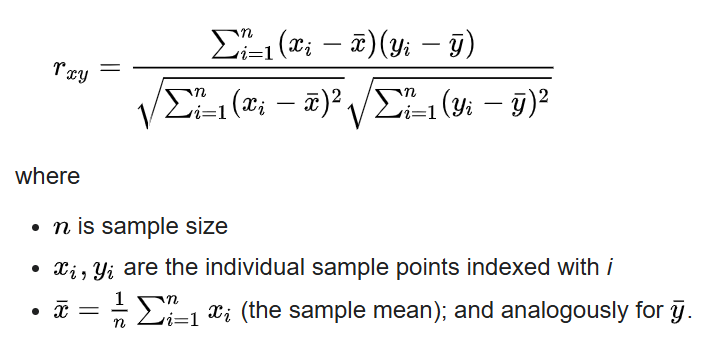

But, if the variables are measured in Ordinal Level/Scale then we use the **Spearman Rank Correlation Coefficient, ρ (rho)**.

- **Positive Correlation:** Both Variables Move Together.
0 < r <= 1.
- **Negative Correlation:** The Variables Move in Opposite Direction. -1 =< r > 0
- **No Correlation:** No Relationship Exists. r = 0

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Print the correlation between features and the target variable (MEDV)
print(correlation_matrix['MEDV'])

MedInc        0.688075
HouseAge      0.105623
AveRooms      0.151948
AveBedrms    -0.046701
Population   -0.024650
AveOccup     -0.023737
Latitude     -0.144160
Longitude    -0.045967
MEDV          1.000000
Name: MEDV, dtype: float64


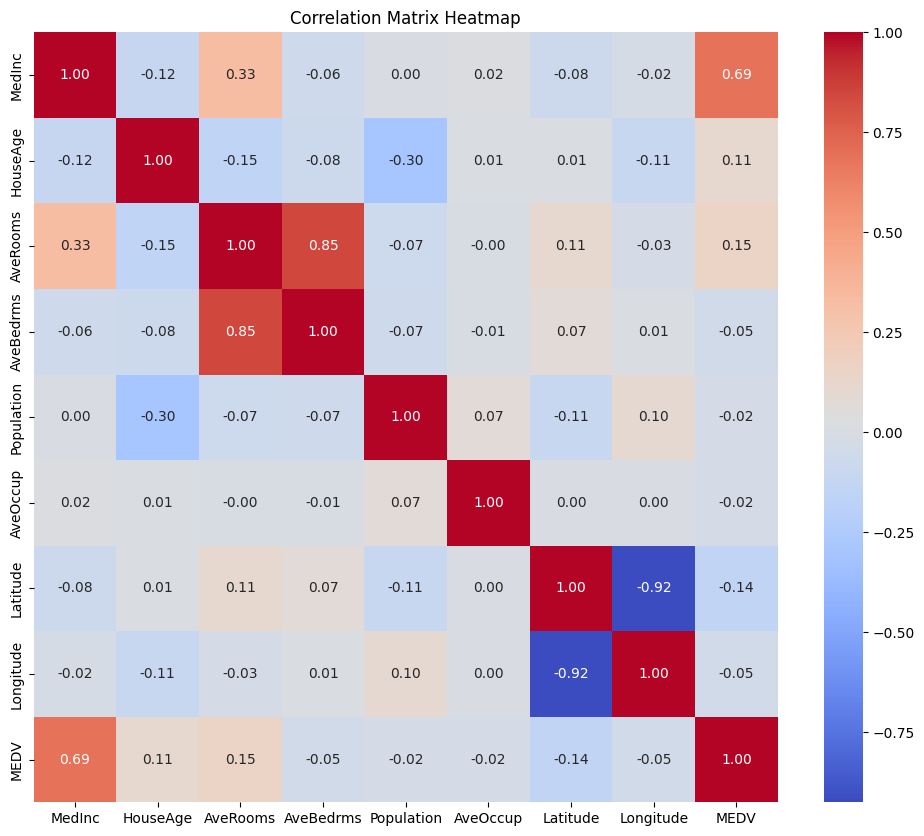

In [ ]:
# Create a heatmap

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

# **Sampling Methods**

## What is Sampling Technique?

A sampling technique is a method used to select a representative subset (sample) from a larger population to make inferences about the entire population. It is used when it is not feasible or practical to collect data from every member of the population.

## Why is Sampling Used?

Sampling is used for several reasons, including:

* **Cost-effectiveness:** Collecting data from a sample is generally less expensive and time-consuming than collecting data from the entire population.

* **Efficiency:** Analyzing a sample can be more efficient than analyzing the entire population, especially for large populations.

* **Practicality:** In some cases, it may be impossible to access or collect data from every member of the population.

## Different Sampling Methods

Here are some common sampling methods:

1. Simple Random Sampling

2. Stratified Sampling

3. Cluster Sampling

4. Systematic Sampling

In [5]:
# Let's Load the Familiar Heart Disease Dataset

df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


### 1. Simple Random Sampling

* **Definition:** In simple random sampling, every individual in the population has an equal chance of being selected for the sample.

* **Use Cases:** When the population is relatively homogeneous and there is no need to consider specific subgroups or characteristics.

* **Advantages:** Easy to implement and ensures that the sample is representative of the population.

* **Disadvantages:** May not be suitable for populations with diverse subgroups or when specific characteristics need to be represented.

* **Example (Heart Disease Dataset):** Randomly selecting 200 patients from the entire dataset to analyze their characteristics and predict heart disease risk.

In [7]:
# Randomly Selecting 200 patients
sample_df = df.sample(n=200, random_state=100)  # random_state ensures reproducibility

# Print the first few rows of the sample
print(sample_df.head())

print(sample_df.info())
# You can now perform further analysis or modeling on this sample


     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
960   52    0   2       136   196    0        0      169      0      0.1   
48    66    0   2       146   278    0        0      152      0      0.0   
886   61    1   0       120   260    0        1      140      1      3.6   
981   39    1   0       118   219    0        1      140      0      1.2   
973   51    1   2       125   245    1        0      166      0      2.4   

     slope  ca  thal  target  
960      1   0     2       1  
48       1   1     2       1  
886      1   1     3       0  
981      1   0     3       0  
973      1   0     2       1  
<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 960 to 872
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       200 non-null    int64  
 1   sex       200 non-null    int64  
 2   cp        200 non-null    int64  
 3   trestbps  200 non-null    int64  
 4   chol      200 no

### 2. Stratified Sampling

* **Definition:** In stratified sampling, the population is divided into subgroups (strata) based on certain characteristics, and then a random sample is selected from each stratum.

* **Use Cases:** When the population is heterogeneous and it is important to ensure that all subgroups are represented in the sample.

* **Advantages:** Guarantees the representation of different subgroups and allows for comparisons between subgroups.

* **Disadvantages:** Requires prior knowledge of the population's characteristics and can be more complex to implement.

* **Example (Heart Disease Dataset):** Dividing the dataset into strata based on age groups (e.g., 20-30, 30-40, etc.) and selecting a random sample from each age group to ensure that all age groups are represented.

In [9]:

# Assuming 'age' is a column in your DataFrame (df)
# Create age groups (strata)
bins = [0, 20, 30, 40, 50, 60, 70, 80]  # Adjust bins as needed
labels = ['0-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, include_lowest=True)

# Stratified sampling with 10 samples per age group
stratified_sample = df.groupby('age_group', group_keys=False).apply(lambda x: x.sample(min(len(x), 10)))

# Now, 'stratified_sample' contains your stratified sample
stratified_sample


<ipython-input-9-04500cc4b05f>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stratified_sample = df.groupby('age_group', group_keys=False).apply(lambda x: x.sample(min(len(x), 10)))
<ipython-input-9-04500cc4b05f>:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratified_sample = df.groupby('age_group', group_keys=False).apply(lambda x: x.sample(min(len(x), 10)))


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group
668,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1,20-29
118,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1,20-29
64,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1,20-29
60,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1,20-29
52,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1,30-39
585,40,1,3,140,199,0,1,178,1,1.4,2,0,3,1,30-39
330,37,0,2,120,215,0,1,170,0,0.0,2,0,2,1,30-39
384,35,1,0,126,282,0,0,156,1,0.0,2,0,3,0,30-39
256,35,0,0,138,183,0,1,182,0,1.4,2,0,2,1,30-39
314,40,1,3,140,199,0,1,178,1,1.4,2,0,3,1,30-39


**Interpreting the Code:**

Stratified sampling with 10 samples per age group:

stratified_sample = df.groupby('age_group', group_keys=False).apply(lambda x: x.sample(min(len(x), 10)))

**df.groupby('age_group', group_keys=False):** This part groups your DataFrame (df) based on the 'age_group' column we just created. It essentially creates separate subsets of data for each age group. group_keys=False prevents the group keys from becoming an index in the result.

**.apply(lambda x: x.sample(min(len(x), 10))):** This line applies a function to each age group subset.

The lambda function is a way to define a small, anonymous function within the code. In this case, it takes one argument (x), which represents each age group subset.

**x.sample(min(len(x), 10)):** This part randomly selects a sample from the current age group subset (x). It ensures you get a maximum of 10 samples or fewer if the age group has less than 10 individuals.

stratified_sample: The result of the stratified sampling, your representative sample, is stored in a new DataFrame called stratified_sample.

### 3. Cluster Sampling

* **Definition:** In cluster sampling, the population is divided into clusters, and then a random sample of clusters is selected. All individuals within the selected clusters are then included in the sample.

* **Use Cases:** When the population is geographically dispersed or when it is difficult to identify individual members of the population.

* **Advantages:** Cost-effective and easier to implement than other sampling methods.

* **Disadvantages:** May not be as representative of the population as other methods, as the sample may be influenced by the characteristics of the selected clusters.


* **Example (Heart Disease Dataset):** Dividing the dataset into clusters based on hospitals or clinics where the patients were treated. Then, randomly selecting a few hospitals/clinics and including all patients from those selected hospitals/clinics in the sample.


### 4. Systematic Sampling

* **Definition:** In systematic sampling, individuals are selected from the population at regular intervals (e.g., every 10th person).

* **Use Cases:** When the population is ordered in some way and it is important to ensure that all parts of the population are represented.

* **Advantages:** Easy to implement and can be more efficient than other methods.

* **Disadvantages:** May not be representative of the population if the population is not randomly ordered.


* **Example (Heart Disease Dataset):** Selecting every 5th patient from the dataset to create a sample. This assumes that the dataset is not ordered in a way that would bias the sample.

In [10]:
# Select every 5th patient
systematic_sample = df.iloc[::5]

# Print the first few rows of the systematic sample
print(systematic_sample.head())

print(systematic_sample.info())

# You can now perform further analysis or modeling on this sample


    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0    52    1   0       125   212    0        1      168      0      1.0   
5    58    0   0       100   248    0        0      122      0      1.0   
10   71    0   0       112   149    0        1      125      0      1.6   
15   34    0   1       118   210    0        1      192      0      0.7   
20   60    1   2       140   185    0        0      155      0      3.0   

    slope  ca  thal  target age_group  
0       2   2     3       0     50-59  
5       1   0     2       1     50-59  
10      1   0     2       1       70+  
15      2   0     2       1     30-39  
20      1   0     2       0     50-59  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 1020
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        205 non-null    int64   
 1   sex        205 non-null    int64   
 2   cp         205 non-null    int64  

# **Probability Concepts, Random Variables, and Probability Distributions**

## What is Probability Theory?

Probability theory deals with the likelihood of events occurring. It provides a framework for quantifying uncertainty and making predictions based on available information.

In essence, it assigns numerical values (probabilities) to events, representing how likely those events are to happen.

## Random Variables

A random variable is a variable whose value is a numerical outcome of a random phenomenon. It can take on different values with associated probabilities.

**Examples (Heart Disease Dataset):**

* **Age:** A random variable representing the age of a patient in the dataset. It can take on different numerical values, each with a certain probability of occurrence.

* **Cholesterol Level:** A random variable representing the cholesterol level of a patient. It can take on different numerical values, each with a certain probability.


* **Target:** *A random variable representing the presence or absence of heart disease (0 or 1). It is a binary random variable with probabilities associated with each outcome (having or not having heart disease).*

## Probability Distributions

A probability distribution describes the probabilities of all possible outcomes of a random variable. It provides a complete summary of the likelihood of different values occurring.

**Common Examples:**

* **Normal Distribution:** A continuous probability distribution characterized by a bell-shaped curve. It is often used to model natural phenomena and many variables in the real world, like Income, BMI, House Price, etc.

* **Binomial Distribution:** A discrete probability distribution that describes the probability of a certain number of successes in a fixed number of independent trials. It is often used to model events like coin flips or the probability of a patient having a certain medical condition.


## Relevance to Heart Disease Dataset

Probability concepts and distributions are relevant to analyzing the heart disease dataset in several ways:

* **Understanding Risk:** We can use probability distributions to estimate the probability of a patient developing heart disease based on various risk factors (age, cholesterol, blood pressure, etc.).

* **Predictive Modeling:** Probability distributions are crucial for building predictive models, such as logistic regression, which estimate the probability of an event (heart disease) occurring based on observed characteristics.

* **Statistical Inference:** Probability concepts are essential for drawing inferences about the population based on a sample of data. We can use probability theory to estimate the confidence in our findings and to test hypotheses about the relationship between heart disease and various risk factors.

* **Decision-Making:** Understanding the probability of different outcomes can help healthcare professionals make informed decisions about patient care and treatment strategies.

By applying probability concepts and distributions, we can gain deeper insights into the factors influencing heart disease and develop more effective strategies for prevention and treatment.

# Potential Need for Variable Transformation

In [ ]:
# Analyze the skewness and kurtosis of the target variable
target_skewness = df['target'].skew()
target_kurtosis = df['target'].kurt()

print(f"Skewness of target variable: {target_skewness:.2f}")
print(f"Kurtosis of target variable: {target_kurtosis:.2f}")

Skewness of target variable: -0.05
Kurtosis of target variable: -2.00


**In the context of linear regression, the target variable might require transformation if it shows significant skewness or kurtosis. This can help improve the model's performance by addressing issues like non-normality of the target variable.**


### Transformation Methods

If transformation of the target variable is deemed necessary, several methods can be applied to address skewness or kurtosis. Some of these methods include:

* **Logarithmic Transformation:** Taking the logarithm of the target variable can reduce right-skewness.
* **Square Root Transformation:** The square root transformation can also be used to reduce right-skewness.
* **Reciprocal Transformation:** Taking the reciprocal of the target variable can address left-skewness.
* **Box-Cox Transformation:** The Box-Cox transformation is a more general approach that can automatically find the optimal transformation based on the data. It can be especially helpful when the skewness is unknown or when the data is highly skewed.

### Impact of Transformation

Transforming the target variable can improve the performance of a linear regression model by:

* **Addressing Non-Normality:** It can help to normalize the distribution of the target variable, aligning it closer to a normal distribution.
* **Stabilizing Variance:** Some transformations can help to stabilize the variance of the target variable, which can be crucial for achieving accurate model estimations.